# (Ford Gobike 2018)
## by (Norah Abdulaziz Alshammari)

## Investigation Overview

> The goal of this investigation is to explore Ford Gobike 2018 dataset to answer :
 * what is the perfect time for bike periodic maintenance?
 * What is the target age and gender of users for promotions on long duration trips ?
 * Would the promotions be on weekdays or weekends?
 



## Dataset Overview

> Ford Gobike is an innovative mode of transportation that allows users to make trips using publicly available bikes. It consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the service area. The bikes can be unlocked from one station and return to any other station in the system, making bike share ideal for short, one-way trips.

> Ford Gobike dataset for 2018 contains information for 1,863,721 bikes trips with 16 feature for each trip and I extract some additional features to help me explore data 

In [21]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [22]:
# load in the dataset into a pandas dataframe
df= pd.read_csv('GoBike_dataset_cleand.csv') 


In [23]:
week_days=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun']
months=['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov','Dec']
seasons=['spring','summer','fall','winter']


def to_cat (categories, ordered,list_col):
    cat =pd.api.types.CategoricalDtype(ordered=ordered,categories= categories)
    for col in list_col:
        df[col]=df[col].astype(cat)
    return 

week_days=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun']
list_col=['start_day','end_day']
to_cat(week_days,True,list_col)

months=['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov','Dec']
list_col=['start_month','end_month']
to_cat(months,True,list_col)


list_col=['season']
to_cat(seasons,True,list_col)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Number of trips per day of each month)

> The ideal time for regular bike maintenance is when demand is low on bikes, the plot shows that in which day of the month the demand for bikes increases and in which day month does it decrease and as we can see that January Sundays has the lowest demand whereas October Wednesdays have the higher demands  on bikes, so the ideal time for regular bike maintenance is in January Sundays.

Text(0.5, 1.0, 'Number of trips per day of each month')

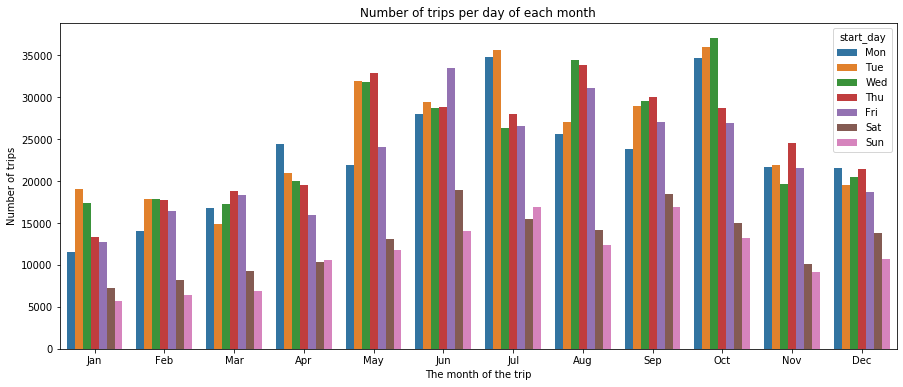

In [30]:
plt.figure(figsize=[15, 6])
sb.countplot(data = df, x = 'start_month', hue = 'start_day')
plt.ylabel('Number of trips')
plt.xlabel('The month of the trip')
plt.title('Number of trips per day of each month')

## (Long Trip Duration by Member Age and Gender)

> long trip duration Promotional offers should be directed to a specific user group , The first plot shows that the target user have ages range from 30 to 40 years , whereas the second plots shows that the target gender is both male and female 

Text(0.5, 1.0, 'Trip Duration Higher than 360 minuts by Member Age')

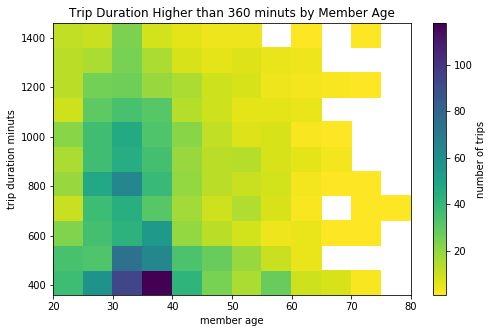

In [25]:
df_sub=df.query('duration_min>360')
plt.figure(figsize = [8 , 5])

bins_x = np.arange(20, 80+5, 5)
bins_y = np.arange(df_sub.duration_min.min(),df_sub.duration_min.max()+100, 100)

plt.hist2d(data = df_sub, x = 'member_age', y = 'duration_min',bins = [bins_x, bins_y],cmin = 0.5,cmap = 'viridis_r')


plt.colorbar(label='number of trips')
plt.xlabel('Member Age')
plt.ylabel('trip duration minuts')
plt.title ('Trip Duration Higher than 360 minuts by Member Age')


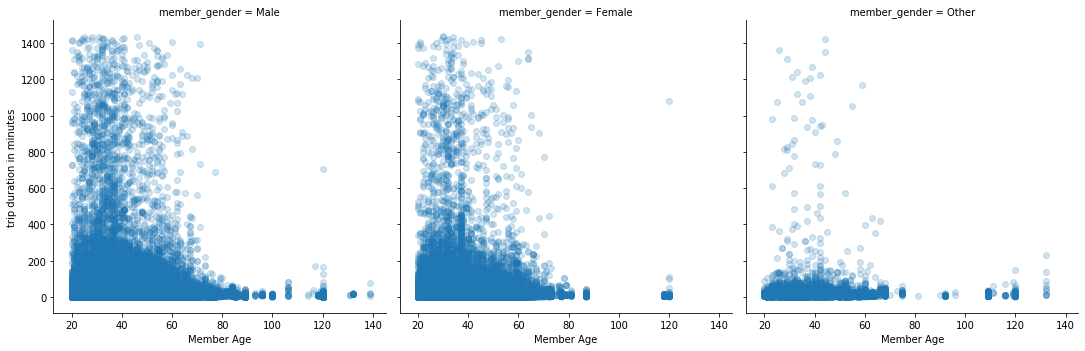

In [29]:
g = sb.FacetGrid(data = df, col = 'member_gender', size = 5,col_wrap = 4)
g.map(plt.scatter, 'member_age', 'duration_min',alpha=1/5)
g.set_ylabels('trip duration in minutes')
g.set_xlabels('Member Age')

## (Number of trips on weekdays and weekends)
> It is advisable to place promotional offers on low demand days to help increase the demand for bicycles on these days. In this case, the plots show that the appropriate time for promotions is on weekends.


Text(0, 0.5, 'Number of trips')

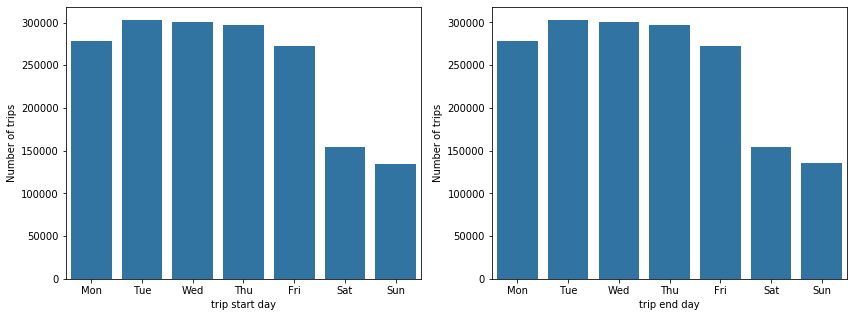

In [31]:
plt.figure(figsize = [14, 5])

plt.subplot(1, 2, 1)
sb.countplot(data = df, x ='start_day', color = base_color)
plt.xlabel('trip start day')
plt.ylabel('Number of trips')

plt.subplot(1, 2, 2)
sb.countplot(data = df, x ='end_day', color = base_color)
plt.xlabel('trip end day')
plt.ylabel('Number of trips')